In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with WMF model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.baseline.wmf import WMF

## Datasets

In [3]:
## Uncomment corresponding directory.
DATA_DIR = Path('../../data/ML20M/')
# DATA_DIR = Path('../../data/Amazon Video Games/')
# DATA_DIR = Path('../../data/Publiq/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = WMF

# L2 = [10 ** p for p in range(1, 5)]
# ALPHA = [10 ** p for p in range(0, 4)]
L2 = [50, 100, 200, 500]
ALPHA = [5, 10, 20, 50]
T = [100, 200, 300]
MAX_ITER = 20
HYPERPARAMS = {'l2': L2, 'alpha': ALPHA, 'max_iterations': MAX_ITER, 't': T}
HYPERPARAMS

{'l2': [50, 100, 200, 500],
 'alpha': [5, 10, 20, 50],
 'max_iterations': 20,
 't': [100, 200, 300]}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags
# HYPERPARAMS['t'] = t
del S, tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

In [7]:
# # debug
# d_items = 1000
# S = S[:d_items,:]
# tags = tags[:d_items]
# X = X[:,:d_items]
# Xval_in = Xval_in[:,:d_items]
# Xval_out = Xval_out[:,:d_items]
# Xtest_in = Xtest_in[:,:d_items]
# Xtest_out = Xtest_out[:,:d_items]

## Perform gridsearch on validation set

In [8]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, None, Xval_in, Xval_out, HYPERPARAMS)

Training model WMF with hyperparameters {'l2': 50, 'alpha': 5, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.36
Average Recall@100 0.609
Average nDCG@100 0.388
Training model WMF with hyperparameters {'l2': 100, 'alpha': 5, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.367
Average Recall@100 0.617
Average nDCG@100 0.394
Training model WMF with hyperparameters {'l2': 200, 'alpha': 5, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.373
Average Recall@100 0.621
Average nDCG@100 0.401
Training model WMF with hyperparameters {'l2': 500, 'alpha': 5, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.304
Average Recall@100 0.538
Average nDCG@100 0.333
Training model WMF with hyperparameters {'l2': 50, 'alpha': 10, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.365
Average Recall@100 0.621
Average nDCG@100 0.391
Training model WMF with hyperparameters {'l2': 100, 'alpha': 10, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.37
Average Recall@100 0.627
Average nDCG@100 0.396
Training model WMF with hyperparameters {'l2': 200, 'alpha': 10, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.375
Average Recall@100 0.633
Average nDCG@100 0.404
Training model WMF with hyperparameters {'l2': 500, 'alpha': 10, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.342
Average Recall@100 0.587
Average nDCG@100 0.372
Training model WMF with hyperparameters {'l2': 50, 'alpha': 20, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.356
Average Recall@100 0.625
Average nDCG@100 0.382
Training model WMF with hyperparameters {'l2': 100, 'alpha': 20, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.361
Average Recall@100 0.63
Average nDCG@100 0.388
Training model WMF with hyperparameters {'l2': 200, 'alpha': 20, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.37
Average Recall@100 0.637
Average nDCG@100 0.396
Training model WMF with hyperparameters {'l2': 500, 'alpha': 20, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.372
Average Recall@100 0.628
Average nDCG@100 0.4
Training model WMF with hyperparameters {'l2': 50, 'alpha': 50, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.331
Average Recall@100 0.616
Average nDCG@100 0.355
Training model WMF with hyperparameters {'l2': 100, 'alpha': 50, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.335
Average Recall@100 0.618
Average nDCG@100 0.359
Training model WMF with hyperparameters {'l2': 200, 'alpha': 50, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.343
Average Recall@100 0.626
Average nDCG@100 0.368
Training model WMF with hyperparameters {'l2': 500, 'alpha': 50, 'max_iterations': 20, 't': 100}



Evaluating with 10000 users
Average Recall@20 0.36
Average Recall@100 0.638
Average nDCG@100 0.386
Training model WMF with hyperparameters {'l2': 50, 'alpha': 5, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.327
Average Recall@100 0.579
Average nDCG@100 0.36
Training model WMF with hyperparameters {'l2': 100, 'alpha': 5, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.352
Average Recall@100 0.612
Average nDCG@100 0.381
Training model WMF with hyperparameters {'l2': 200, 'alpha': 5, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.38
Average Recall@100 0.628
Average nDCG@100 0.407
Training model WMF with hyperparameters {'l2': 500, 'alpha': 5, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.304
Average Recall@100 0.538
Average nDCG@100 0.333
Training model WMF with hyperparameters {'l2': 50, 'alpha': 10, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.343
Average Recall@100 0.593
Average nDCG@100 0.369
Training model WMF with hyperparameters {'l2': 100, 'alpha': 10, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.353
Average Recall@100 0.61
Average nDCG@100 0.381
Training model WMF with hyperparameters {'l2': 200, 'alpha': 10, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.379
Average Recall@100 0.635
Average nDCG@100 0.403
Training model WMF with hyperparameters {'l2': 500, 'alpha': 10, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.343
Average Recall@100 0.588
Average nDCG@100 0.373
Training model WMF with hyperparameters {'l2': 50, 'alpha': 20, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.343
Average Recall@100 0.598
Average nDCG@100 0.368
Training model WMF with hyperparameters {'l2': 100, 'alpha': 20, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.353
Average Recall@100 0.612
Average nDCG@100 0.379
Training model WMF with hyperparameters {'l2': 200, 'alpha': 20, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.37
Average Recall@100 0.633
Average nDCG@100 0.397
Training model WMF with hyperparameters {'l2': 500, 'alpha': 20, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.375
Average Recall@100 0.631
Average nDCG@100 0.403
Training model WMF with hyperparameters {'l2': 50, 'alpha': 50, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.334
Average Recall@100 0.598
Average nDCG@100 0.357
Training model WMF with hyperparameters {'l2': 100, 'alpha': 50, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.338
Average Recall@100 0.606
Average nDCG@100 0.364
Training model WMF with hyperparameters {'l2': 200, 'alpha': 50, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.35
Average Recall@100 0.622
Average nDCG@100 0.375
Training model WMF with hyperparameters {'l2': 500, 'alpha': 50, 'max_iterations': 20, 't': 200}



Evaluating with 10000 users
Average Recall@20 0.37
Average Recall@100 0.645
Average nDCG@100 0.399
Training model WMF with hyperparameters {'l2': 50, 'alpha': 5, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.302
Average Recall@100 0.552
Average nDCG@100 0.337
Training model WMF with hyperparameters {'l2': 100, 'alpha': 5, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.343
Average Recall@100 0.607
Average nDCG@100 0.373
Training model WMF with hyperparameters {'l2': 200, 'alpha': 5, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.382
Average Recall@100 0.63
Average nDCG@100 0.408
Training model WMF with hyperparameters {'l2': 500, 'alpha': 5, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.304
Average Recall@100 0.538
Average nDCG@100 0.333
Training model WMF with hyperparameters {'l2': 50, 'alpha': 10, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.32
Average Recall@100 0.568
Average nDCG@100 0.35
Training model WMF with hyperparameters {'l2': 100, 'alpha': 10, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.341
Average Recall@100 0.597
Average nDCG@100 0.37
Training model WMF with hyperparameters {'l2': 200, 'alpha': 10, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.377
Average Recall@100 0.637
Average nDCG@100 0.404
Training model WMF with hyperparameters {'l2': 500, 'alpha': 10, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.343
Average Recall@100 0.588
Average nDCG@100 0.373
Training model WMF with hyperparameters {'l2': 50, 'alpha': 20, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.328
Average Recall@100 0.574
Average nDCG@100 0.352
Training model WMF with hyperparameters {'l2': 100, 'alpha': 20, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.344
Average Recall@100 0.597
Average nDCG@100 0.37
Training model WMF with hyperparameters {'l2': 200, 'alpha': 20, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.367
Average Recall@100 0.629
Average nDCG@100 0.393
Training model WMF with hyperparameters {'l2': 500, 'alpha': 20, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.376
Average Recall@100 0.632
Average nDCG@100 0.404
Training model WMF with hyperparameters {'l2': 50, 'alpha': 50, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.326
Average Recall@100 0.576
Average nDCG@100 0.35
Training model WMF with hyperparameters {'l2': 100, 'alpha': 50, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.332
Average Recall@100 0.591
Average nDCG@100 0.359
Training model WMF with hyperparameters {'l2': 200, 'alpha': 50, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.348
Average Recall@100 0.617
Average nDCG@100 0.376
Training model WMF with hyperparameters {'l2': 500, 'alpha': 50, 'max_iterations': 20, 't': 300}



Evaluating with 10000 users
Average Recall@20 0.377
Average Recall@100 0.647
Average nDCG@100 0.404



In [9]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.40832434697383124 achieved with {'l2': 200, 'alpha': 5, 'max_iterations': 20, 't': 300}."

## Evaluate model with optimal hyperparams on test set

In [10]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X)


CPU times: user 11min 52s, sys: 1min 36s, total: 13min 28s
Wall time: 1min 13s


In [11]:
%%time
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set



Evaluating with 10000 users
Average Recall@20 0.382
Average Recall@100 0.626
Average nDCG@100 0.406
CPU times: user 3min 18s, sys: 1.82 s, total: 3min 20s
Wall time: 2min 33s


## Plot amount of items from long tail recommended

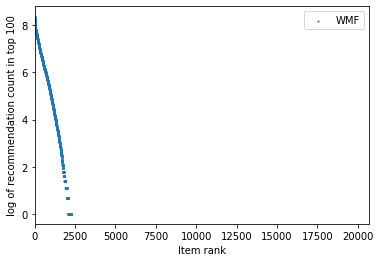

In [12]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["WMF"], k=100)